In [1]:
# Set up working environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
from termcolor import colored

print(colored('\nAll libraries imported succesfully.', 'green'))


All libraries imported succesfully.


## Import Dataset

In [2]:
raw_data = pd.read_csv('adult.data', header=None) 
col_names = ['age', 'workclass','fnlwgt','education','education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'target']
raw_data.columns = col_names
raw_data['ID'] = raw_data.index.astype(str)
display(raw_data)
raw_data.info()


num_cols = ['ID'] + [col for col in raw_data.columns if raw_data[col].dtype in ['int64', 'float64']] + ['target']
num_data = raw_data[num_cols].copy()
display(num_data)

# num_cols = [col for col in raw_data.columns if col == 'target' or raw_data[col].dtype in ['int64', 'float64']]
# num_data = raw_data[num_cols]
# display(num_data)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,ID
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32556
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32557
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32558
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,32559


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
 15  ID              32561 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
0,0,39,77516,13,2174,0,40,<=50K
1,1,50,83311,13,0,0,13,<=50K
2,2,38,215646,9,0,0,40,<=50K
3,3,53,234721,7,0,0,40,<=50K
4,4,28,338409,13,0,0,40,<=50K
...,...,...,...,...,...,...,...,...
32556,32556,27,257302,12,0,0,38,<=50K
32557,32557,40,154374,9,0,0,40,>50K
32558,32558,58,151910,9,0,0,40,<=50K
32559,32559,22,201490,9,0,0,20,<=50K


### First look


 Summary statistics for adult


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


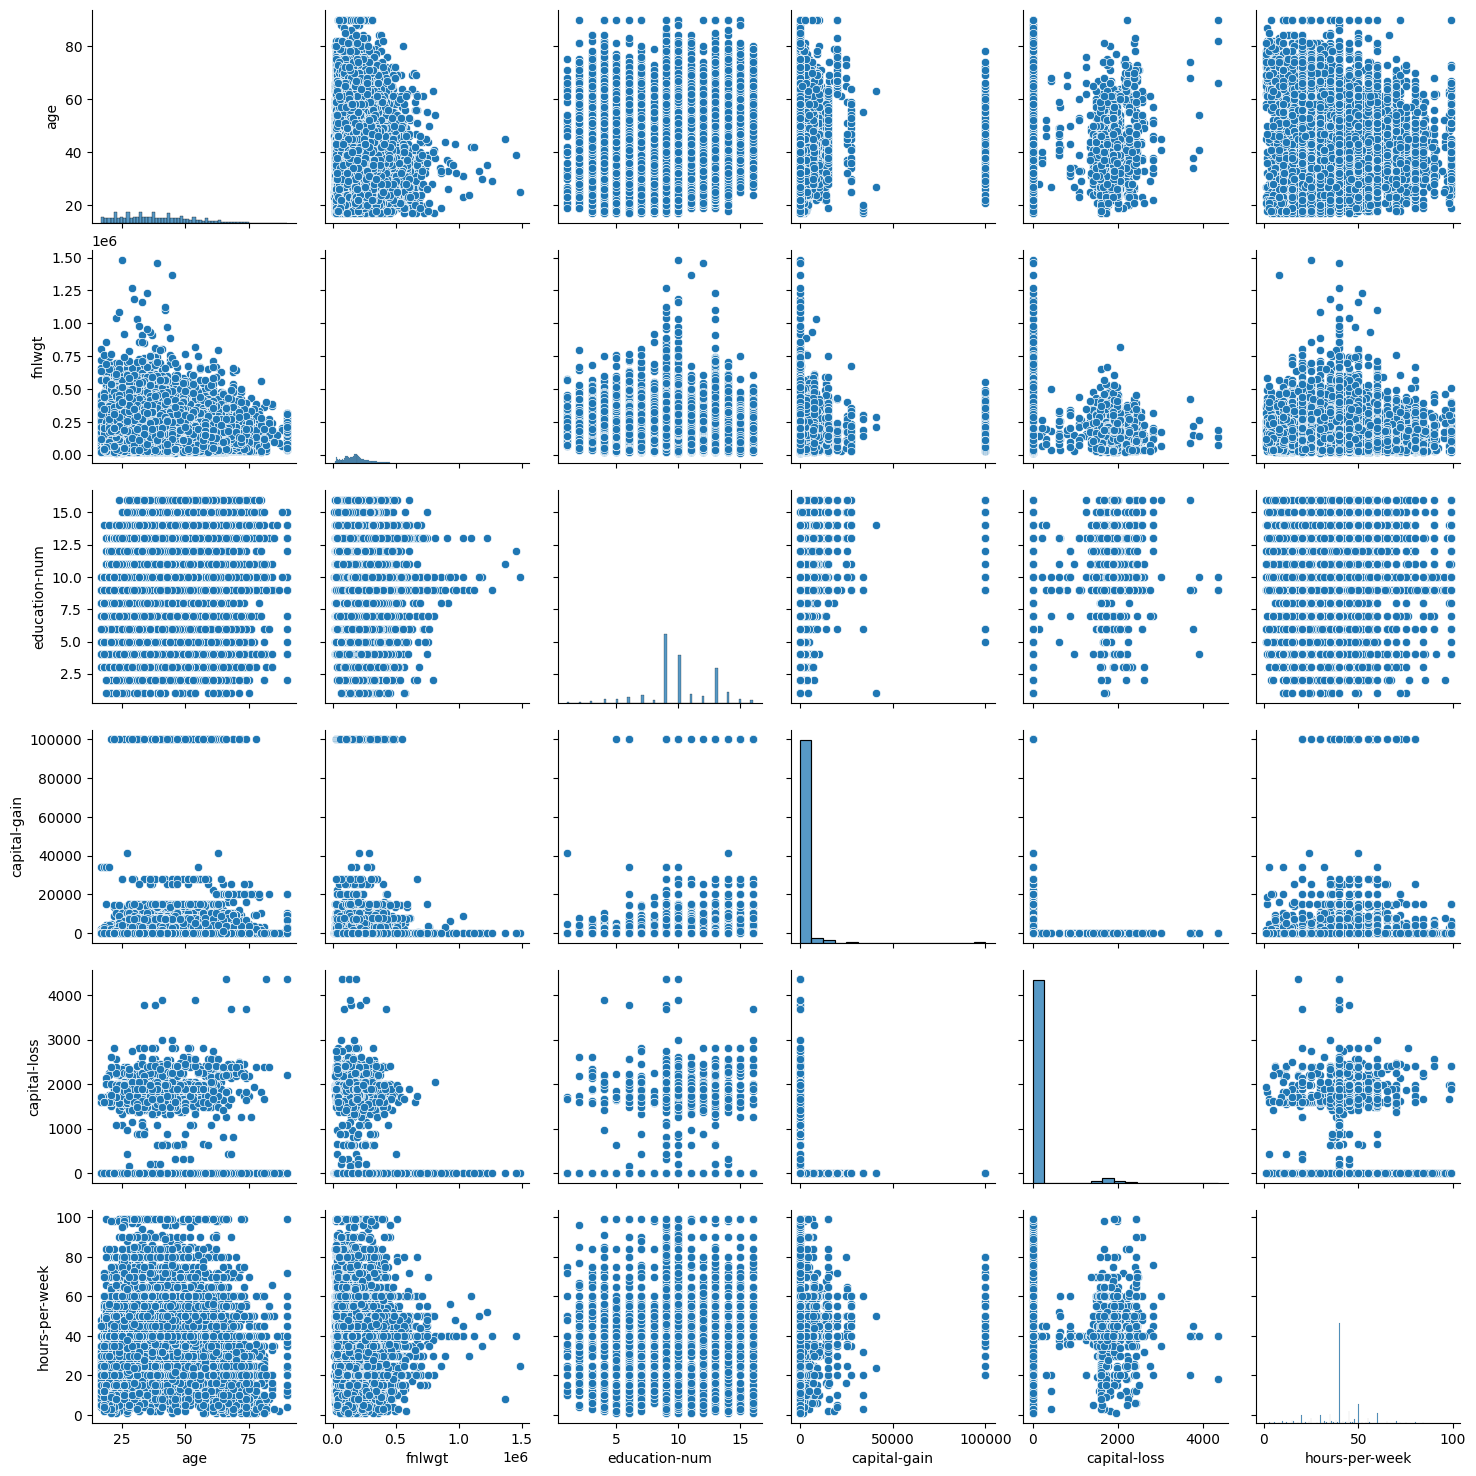

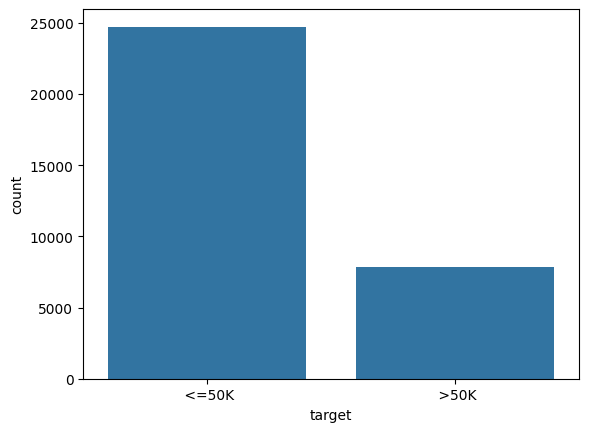

In [5]:
print('\n Summary statistics for adult')
display(num_data.describe())

sns.pairplot(raw_data)
plt.show()

sns.countplot(data=raw_data, x='target')
plt.show()


capitol-gain and capitol loss have large proportions of 0 values. These seem like legitimate values, and will be kept in.

The data is however in vastly different ranges. They will have to be scaled.

Because there are a large number of non-outlier 0 data, and the distributions of the variables do **not** follow a Gaussian distribution, I will use the min-Max scaler.

In [4]:
# 0. Add unique ID to each feature

#1. Min_Max Scaler over everything except target and ID
target = 'target'
id = 'ID'
scaler = MinMaxScaler()
features = [col for col in num_data.columns if col != target and col != id]
print(features)

num_data[features] = scaler.fit_transform(num_data[features])
# display(num_data)
scaled_data = num_data.copy()
# display(scaled_data)
#2. split into train and test and save to excel files
train_data_control, test_data = train_test_split(scaled_data, test_size=0.3, random_state=420)
# train_data_control.head()
train_data_control.to_excel("train_data_control.xlsx", index=False)
test_data.to_excel("test_data.xlsx", index=False)



#3 make 3 compies of training data
train_data_10 = train_data_control.copy()
train_data_40 = train_data_control.copy()
train_data_70 = train_data_control.copy()


#4. introduce missing values to the three compies: 10% missing values, 40% missing values and 70% missing values

# 10% missing values
percentage = 0.1
n_na = int(round(percentage*len(train_data_control))) 
cols = [col for col in num_data.columns if col != id]
print(n_na)

# Loop through each column (except 'ID' and 'target')
for col in cols:
    missing_data_indices = np.random.choice(train_data_10.index, size=n_na, replace=False)
    train_data_10.loc[missing_data_indices, col] = np.nan

# Count the number of NAs in each column
na_counts = train_data_10.isna().sum()
print(na_counts)
display(train_data_10)

# Save to excel
train_data_10.to_excel('train_data_10.xlsx', index=False)
train_data_10.to_csv('train_data_10.csv', index=False)

# 40% missing values
percentage = 0.4
n_na = int(round(percentage*len(train_data_control))) 
print(n_na)

# Loop through each column (except 'ID' and 'target')
for col in cols:
    missing_data_indices = np.random.choice(train_data_40.index, size=n_na, replace=False)
    train_data_40.loc[missing_data_indices, col] = np.nan

# Count the number of NAs in each column
na_counts = train_data_40.isna().sum()
print(na_counts)
display(train_data_40)

# Save to excel
train_data_40.to_excel('train_data_40.xlsx', index=False)
train_data_40.to_csv('train_data_40.csv', index=False)

# 70% missing values
percentage = 0.7
n_na = int(round(percentage*len(train_data_control))) 
print(n_na)

# Loop through each column (except 'ID' and 'target')
for col in cols:
    missing_data_indices = np.random.choice(train_data_70.index, size=n_na, replace=False)
    train_data_70.loc[missing_data_indices, col] = np.nan

# Count the number of NAs in each column
na_counts = train_data_70.isna().sum()
print(na_counts)
display(train_data_70)

# Save to excel
train_data_70.to_excel('train_data_70.xlsx', index=False)
train_data_70.to_csv('train_data_70.csv', index=False)






['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
2279
ID                   0
age               2279
fnlwgt            2279
education-num     2279
capital-gain      2279
capital-loss      2279
hours-per-week    2279
target            2279
dtype: int64


,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
9714,9714,0.178082,0.097373,0.533333,0.0000,NaN,0.357143,<=50K
1826,1826,0.068493,0.129471,0.533333,1.0000,0.000000,0.397959,>50K
9507,9507,0.095890,0.068717,0.533333,0.0000,0.000000,0.397959,<=50K
27887,27887,0.082192,0.300917,NaN,0.0000,0.000000,0.397959,<=50K
13104,13104,NaN,0.106844,0.400000,NaN,0.000000,0.397959,<=50K
...,...,...,...,...,...,...,...,...
29471,29471,0.273973,0.228504,0.933333,0.0000,NaN,0.500000,>50K
21055,21055,0.520548,0.090279,0.600000,0.0465,0.000000,0.193878,<=50K
20870,20870,0.369863,0.123332,0.666667,0.0000,0.307622,0.397959,<=50K
29768,29768,NaN,0.154971,0.866667,0.0000,0.000000,0.346939,<=50K


9117
ID                   0
age               9117
fnlwgt            9117
education-num     9117
capital-gain      9117
capital-loss      9117
hours-per-week    9117
target            9117
dtype: int64


,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
9714,9714,NaN,0.097373,0.533333,NaN,NaN,NaN,<=50K
1826,1826,0.068493,NaN,NaN,NaN,0.000000,0.397959,NaN
9507,9507,0.095890,0.068717,0.533333,NaN,NaN,NaN,<=50K
27887,27887,0.082192,0.300917,NaN,0.0,0.000000,0.397959,<=50K
13104,13104,0.643836,NaN,0.400000,0.0,0.000000,0.397959,<=50K
...,...,...,...,...,...,...,...,...
29471,29471,NaN,NaN,0.933333,0.0,0.000000,0.500000,NaN
21055,21055,NaN,0.090279,0.600000,NaN,NaN,NaN,NaN
20870,20870,NaN,NaN,0.666667,0.0,0.307622,NaN,<=50K
29768,29768,NaN,NaN,0.866667,0.0,0.000000,NaN,<=50K


15954
ID                    0
age               15954
fnlwgt            15954
education-num     15954
capital-gain      15954
capital-loss      15954
hours-per-week    15954
target            15954
dtype: int64


,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
9714,9714,NaN,NaN,NaN,NaN,0.000000,NaN,<=50K
1826,1826,0.068493,NaN,NaN,NaN,NaN,0.397959,NaN
9507,9507,0.095890,NaN,0.533333,NaN,NaN,0.397959,NaN
27887,27887,NaN,0.300917,0.533333,NaN,NaN,0.397959,NaN
13104,13104,NaN,NaN,0.400000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29471,29471,NaN,NaN,0.933333,0.0000,NaN,0.500000,NaN
21055,21055,NaN,NaN,0.600000,0.0465,NaN,0.193878,NaN
20870,20870,NaN,NaN,NaN,NaN,0.307622,0.397959,<=50K
29768,29768,0.287671,NaN,NaN,NaN,0.000000,NaN,<=50K
